### DGIM

In [9]:
import random

In [10]:
class Bucket:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    
    def __repr__(self):
        return f'({self.start},{self.end})'
        
        
class DGIM:
    def __init__(self):
        self.bucket_tower = [[]]
        self.ts = 0 # timestamp
        
    def put(self, bit):
        if bit == 1:
            self.bucket_tower[0].insert(0, Bucket(self.ts, self.ts))  # 계속 쌓임
            
            layer = 0
            while len(self.bucket_tower[layer]) > 2:
                if len(self.bucket_tower) <= layer+1:
                    self.bucket_tower.append([])
                    
                b1 = self.bucket_tower[layer].pop()
                b2 = self.bucket_tower[layer].pop()
                b1.end = b2.end
                
                self.bucket_tower[layer+1].insert(0,b1)
                layer += 1  
        
        self.ts += 1
        
    def count(self, k):
        s = self.ts - k
        
        cnt = 0
        
        for layer, buckets in enumerate(self.bucket_tower):
            for bucket in buckets:
                if s < bucket.start:
                    cnt += (1 << layer)
                elif s <= bucket.end:
                    cnt += (1 << layer) * (bucket.end-s+1) // (bucket.end - bucket.start +1)
                    return cnt
                else:
                    return cnt
        return cnt
    
    
    
dgim = DGIM()

bitstream = []
for i in range(10):
    prob = random.random()
    for j in range(random.randrange(20,51)):
        if random.random() < prob:
            bitstream.append(1)
        else:
            bitstream.append(0)

for b in bitstream:
    dgim.put(b)

for k in range(1,200):
    print(k, dgim.count(k), sum(bitstream[-k:]))

1 1 1
2 1 1
3 2 2
4 3 3
5 3 3
6 4 4
7 5 5
8 5 6
9 6 7
10 7 7
11 7 8
12 8 8
13 9 9
14 9 9
15 9 9
16 9 9
17 9 9
18 9 10
19 10 10
20 10 10
21 11 10
22 11 10
23 12 11
24 12 12
25 13 13
26 13 13
27 13 13
28 13 14
29 14 14
30 15 14
31 15 15
32 16 16
33 17 17
34 17 18
35 18 18
36 19 19
37 19 20
38 20 20
39 21 21
40 21 22
41 22 22
42 22 22
43 23 22
44 24 23
45 24 24
46 25 24
47 26 25
48 26 25
49 27 25
50 28 26
51 28 26
52 29 27
53 29 28
54 30 28
55 31 28
56 31 29
57 32 30
58 33 31
59 33 32
60 34 33
61 35 34
62 35 35
63 36 36
64 37 37
65 37 38
66 38 39
67 38 40
68 39 40
69 40 41
70 40 41
71 41 42
72 42 43
73 42 44
74 43 44
75 44 45
76 44 46
77 45 47
78 45 47
79 46 48
80 47 49
81 47 49
82 48 50
83 49 50
84 49 50
85 50 50
86 51 50
87 51 51
88 52 52
89 53 53
90 53 54
91 53 54
92 53 54
93 54 54
94 54 54
95 54 54
96 54 55
97 55 55
98 55 55
99 55 55
100 56 55
101 56 55
102 56 55
103 56 55
104 57 55
105 57 55
106 57 55
107 57 55
108 58 55
109 58 56
110 58 56
111 59 56
112 59 56
113 59 56
114 59 56
115

- DGIM 응용  
    1) 모든 정수가 m 비트 이하라면

In [11]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
class Bucket:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    
    def __repr__(self):
        return f'({self.start},{self.end})'
        
        
class DGIM:
    def __init__(self):
        self.bucket_tower = [[]]
        self.ts = 0 # timestamp
        
    def put(self, bit):
        if bit == 1:
            self.bucket_tower[0].insert(0, Bucket(self.ts, self.ts))  # 계속 쌓임
            
            layer = 0
            while len(self.bucket_tower[layer]) > 2:
                if len(self.bucket_tower) <= layer+1:
                    self.bucket_tower.append([])
                    
                b1 = self.bucket_tower[layer].pop()
                b2 = self.bucket_tower[layer].pop()
                b1.end = b2.end
                
                self.bucket_tower[layer+1].insert(0,b1)
                layer += 1  
        
        self.ts += 1
        
    def count(self, k):
        s = self.ts - k
        
        cnt = 0
        
        for layer, buckets in enumerate(self.bucket_tower):
            for bucket in buckets:
                if s < bucket.start:
                    cnt += (1 << layer)
                elif s <= bucket.end:
                    cnt += (1 << layer) * (bucket.end-s+1) // (bucket.end - bucket.start +1)
                    return cnt
                else:
                    return cnt
        return cnt


class DGIM_div:
    def __init__(self, bit): # 비트를 몇으로 할지 확인
        self.bit = bit
    
    def Binary(self, num):
        bi = []
        while num != 0:
            if num % 2 == 1:
                bi.append(1)
                num = (num - 1)/2
            else:
                bi.append(0)
                num /= 2
        for i in range(self.bit - len(bi)): # 특정 비트로 맞춰주기 위하여 부족한 횟수만큼 반복해줌 
            bi.insert(len(bi),0)

        return bi
    
    def count(self, k):
        # 2의 제곱수대로 DGIM 생성
        dgim_0 = DGIM()
        dgim_1 = DGIM()
        dgim_2 = DGIM()
        dgim_3 = DGIM()
        
        for b in bitstream:
            dgim_0.put(self.Binary(b)[0])
            dgim_1.put(self.Binary(b)[1])
            dgim_2.put(self.Binary(b)[2])
            dgim_3.put(self.Binary(b)[3])
        return dgim_0.count(k)+(dgim_1.count(k)*2)+(dgim_2.count(k)*4)+(dgim_3.count(k)*8)

- DGIM 응용  
    2) 영역에 부분합 저장하기

In [13]:
class Bucket_sum:
    def __init__(self, start, end, sob):
        self.start = start
        self.end = end
        self.sum_of_bucket = sob
        
    def __repr__(self):
        return f'({self.start},{self.end}),sum:{self.sum_of_bucket}'
        
        
class DGIM_sum:
    def __init__(self):
        self.bucket_tower = [[]]
        self.ts = 0 # timestamp
        
    def put(self, bit):
        self.bucket_tower[0].insert(0, Bucket_sum(self.ts, self.ts, bit))  # 계속 쌓임
        layer = 0
        while len(self.bucket_tower[layer]) > 2:
            if len(self.bucket_tower) <= layer+1:
                self.bucket_tower.append([])
                
            b1 = self.bucket_tower[layer].pop() # 맨 뒤에 있는 값을 b1으로 할당
            b2 = self.bucket_tower[layer][-1] # 그 앞에 있는 갑을 b2로 할당(0이면 단순하게 버렸던 작업과 다르게 처리)
            
            if 2** (layer+1) >= b1.sum_of_bucket + b2.sum_of_bucket: # 합이 제곱수보다 큰 경우는 갱신
                
                b1.sum_of_bucket += b2.sum_of_bucket # 합을 계속 저장
                b1.end = b2.end # 합쳐줌
                self.bucket_tower[layer].pop() # 합쳐줬기 때문에 b2를 없애줌
                
                self.bucket_tower[layer+1].insert(0,b1) 
            
            else:
                self.bucket_tower[layer+1].insert(0,b1)
            
            layer += 1 # 층수 갱신
                
        self.ts += 1 # 타임스탬프 갱신
        
    def count(self, k):
        s = self.ts - k
        
        cnt = 0
        
        for layer, buckets in enumerate(self.bucket_tower):
            for bucket in buckets:
                if s < bucket.start:
                    cnt += bucket.sum_of_bucket
                elif s <= bucket.end:
                    cnt += round((bucket.sum_of_bucket * (bucket.end - s +1) / (bucket.end-bucket.start+1)))
                    return cnt
                else:
                    return cnt
        return cnt


In [14]:
# 실제값과의 차이를 구함
dgim_div = DGIM_div(4)
dgim_sum = DGIM_sum()

bitstream = []
for i in range(10000): # 반복횟수
    bitstream.append(random.randrange(0,16))

# dgim_sum만 적용
for b in bitstream:
    dgim_sum.put(b)    

# 그래프로 그리기 위하여 데이터프레임으로 만들어줌
df = []
for k in range(1,2001):
    df.append((k, dgim_div.count(k), dgim_sum.count(k), sum(bitstream[-k:])))
df = pd.DataFrame(df, columns=['횟수', '방법_1', '방법_2', '실제값']);df

,횟수,방법_1,방법_2,실제값
0,1,9,9,9
1,2,13,21,21
2,3,27,27,27
3,4,27,27,27
4,5,35,39,39
...,...,...,...,...
1995,1996,15151,15177,15227
1996,1997,15151,15184,15230
1997,1998,15166,15192,15236
1998,1999,15166,15199,15242


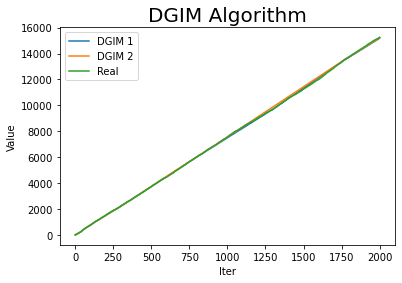

In [15]:
# 한번에 확인
plt.plot(df['횟수'], df['방법_1'], label = 'DGIM 1')
plt.plot(df['횟수'], df['방법_2'], label = 'DGIM 2')
plt.plot(df['횟수'], df['실제값'], label = 'Real')
plt.title('DGIM Algorithm', size=20)
plt.ylabel('Value', size=10)
plt.xlabel('Iter', size=10)
plt.legend()
# plt.savefig('./img/DGIM.png')
plt.show()

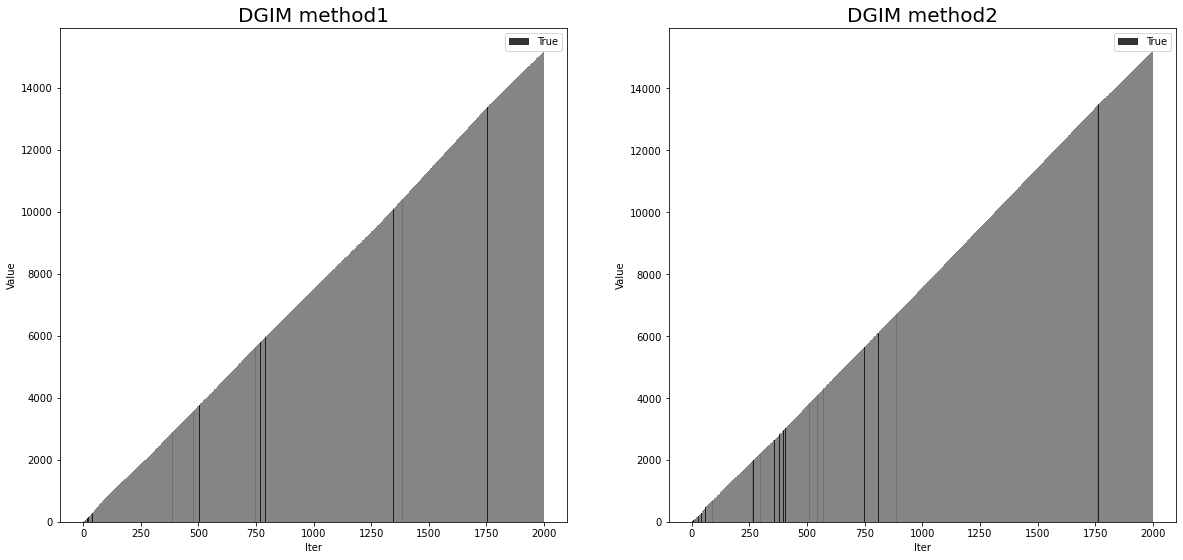

In [16]:
# 방법1에서 정확하게 맞은 값만 빨간색으로 표시
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
colors = ['black' if i == 1  else 'gray' for i in list(df['방법_1'] == df['실제값'])]
plt.bar(df['횟수'], df['방법_1'],color = colors, label = 'True',  alpha = 0.8, width=2)
plt.title('DGIM method1', size=20)
plt.ylabel('Value', size=10)
plt.xlabel('Iter', size=10)
plt.legend()
# 방법 2
plt.subplot(2, 2, 2)
colors = ['black' if i == 1  else 'gray' for i in list(df['방법_2'] == df['실제값'])]
plt.bar(df['횟수'], df['방법_2'],color = colors, label = 'True', alpha = 0.8, width=2)
plt.title('DGIM method2', size=20)
plt.ylabel('Value', size=10)
plt.xlabel('Iter', size=10)
plt.legend()

# plt.savefig('./img/DGIM_1.png')
plt.show()

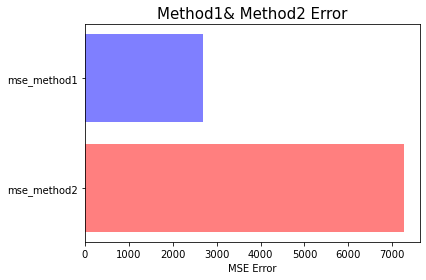

In [17]:
# MSE값으로 확인하기
mse_method1 = ((df['방법_1'] - df['실제값'])**2).sum() / len(df)
mse_method2 = ((df['방법_2'] - df['실제값'])**2).sum() / len(df)
mse = [['mse_method1', mse_method1], ['mse_method2', mse_method2]]
plt.barh([mse[1][0], mse[0][0]], [mse[1][1], mse[0][1]], color = ['red', 'blue'], alpha=0.5)
plt.xlabel('MSE Error', size = 10)
plt.title('Method1& Method2 Error', size = 15)
# plt.savefig('./img/DGIM_MSE.png')
plt.show()